# IRIS FLOWER CLASSIFICATION

Iris flower classification is a well-known machine learning problem in which the goal is to classify the species of the Iris flower based on certain characteristics such as petal length, petal width, sepal length, and sepal width.

## Define the problem:
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

### Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1:Collect and prepare data
Gather relevant data that will be used to train and test the algorithm. Ensure that the data is clean and well-structured, and preprocess it if necessary.

### Import Dataset

In [2]:
data = pd.read_csv('Iris.csv')

### Data Inspecting

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.shape

(150, 6)

In [7]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Data Cleaning

In [8]:
# Dropping id column
data = data.drop('Id', axis = 1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Visualization

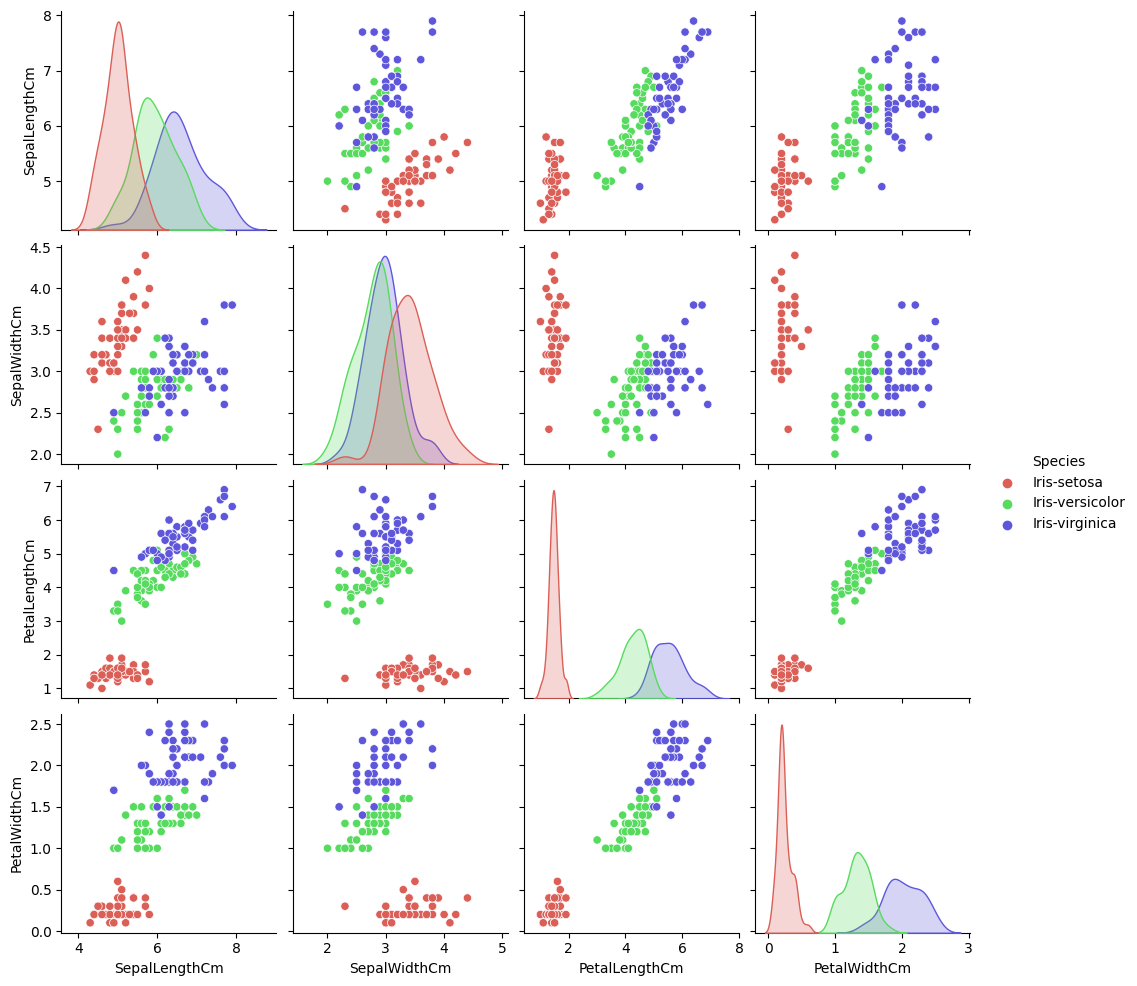

In [9]:
sns.pairplot(data, hue = 'Species', palette = 'hls')

# Step2:Train - Test Split
The dataset is typically split into training and testing sets, and the model is trained on the training set and evaluated on the testing set to measure its accuracy.

In [10]:
x = data.drop(['Species'],1)
x

C:\Users\sudha\AppData\Local\Temp\ipykernel_26056\2680501226.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = data.drop(['Species'],1)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y = data['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

# Step3: Choose a model
Select a machine learning model that is appropriate for the problem you are trying to solve. There are various models available, such as decision trees, neural networks, logistic regression, etc.

 The problem of Iris flower classification is usually approached using supervised learning algorithms, such as logistic regression, decision trees, support vector machines (SVMs), and neural networks.

### Model 1: Logistics Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

c:\Users\sudha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
Predection_1 = lr_model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Predection_1)*100)

96.66666666666667


In [30]:
#Deploy the model on new data and make predictions.

#Predicting Species of new Iris flower

predict_new_flower = lr_model.predict([[5.0,3.3,1.4,0.2]])
print('Species of new Iris flower: ',predict_new_flower)

Species of new Iris flower:  ['Iris-setosa']


c:\Users\sudha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Model 2 : Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:

y_pred = model_dtc.predict(x_test)

df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head()


,Actual,Predicted
29,Iris-setosa,Iris-setosa
61,Iris-versicolor,Iris-versicolor
4,Iris-setosa,Iris-setosa
95,Iris-versicolor,Iris-versicolor
137,Iris-virginica,Iris-virginica


In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)

96.66666666666667


In [28]:
#Deploy the model on new data and make predictions.

#Predicting Species of new Iris flower

predict_new_flower = model_dtc.predict([[5.0,3.3,1.4,0.2]])
print('Species of new Iris flower: ',predict_new_flower)


Species of new Iris flower:  ['Iris-setosa']


c:\Users\sudha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Model 3 : Support Vector Machine Algorithm

In [22]:
from sklearn.svm import SVC
model_svc = SVC()

In [23]:
model_svc.fit(x_train, y_train)

SVC()

In [24]:
Predection_3 = model_svc.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,Predection_3)*100)

93.33333333333333


In [29]:
#Deploy the model on new data and make predictions.

#Predicting Species of new Iris flower

predict_new_flower = model_svc.predict([[5.0,3.3,1.4,0.2]])
print('Species of new Iris flower: ',predict_new_flower)

Species of new Iris flower:  ['Iris-setosa']


c:\Users\sudha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
